# Dynamic Programming
## Bitonic Traveling Salesman

Given a set of points, you must find the shortest path that goes through all points once and ends where you began. Think of this problem in two halves: traveling forward and traveling backwards. If you order the points by increasing x value and start with the leftmost point, you will get to the rightmost point before turning around. This means that the forward path and backward path share a common startpoint and endpoint. You can asses both paths in the forward (left to right) direction since distance does not change. Now, you must determine which points should be on the forward path, and which points should be on the backward path.

Let distance(x, y) be a helper function that returns the euclidean distance between points x and y.

1. Create an $n*n$ matrix where $n$ is the number of points. The points along the index will denote the end of the forward path. The points along the columns will denote the end of the backward path.   
-- e.g. M[2, 4] means that the forward path goes through points 1 -> 2, and the backward path goes through 1 -> 3 -> 4
2. M[1, 1] is initialized to zero, and M[1, 2] is initialized to distance(1, 2)
3. Since M[i, j] = M[j, i] we only need to calculate the values for the top half of the matrix above the M[i, i] diagonal. Fill in the values according to the following cases.
4. Case 1: $i < j - 1$   
M[i, j] = M[i, j-1] + distance(j-1, j)   
Remember, the forward path stops at $i$ and the backwards path stops at $j$. Since $i < j - 1$, it means $j - 1$ cannot be on the forward path (since it stops before reaching $j - 1$). Therefore, we add the distance from $j - 1$ to $j$ because $j - 1$ has to be on the backwards path.
5. Case 2: $i = j - 1$ or $i = j$   
M[i, j] = min( M[k, i] + distance(k, j) for k = [1, i) )   
Here, we only know that the forward path is some path from 1 to $i$. What we can do is consider some point $1 <= k < j$ that divides the forward and backward paths. This makes the total cost of the path equal to the optimal path from $i$ to $k$ which is already calculated in M[i, k] added to the cost of the path from $k$ to $j$ which is the distance between the two points. Because we are minimizing distance, the optimal path is the point $k$ that results in the shortest distance.
6. This means that the optimal path cost is found in M[n, n] because it finds the optimal $k$ that divides the forward and backwards paths.

The progress of the algorithm is shown below. One path is in red, the other is in blue. All paths that were considered for case 2 are printed as well as the selected minimum value. If a path is printed twice but the k value is different, it is because the 'forward' and 'backward' paths were swapped but it does not change the total cost.

In [2]:
import numpy as np
import pandas as pd
import math
from math import inf
import networkx as nx
import matplotlib.pyplot as plt

def style_specific_cell(df, row, col, c):
    df_styler = pd.DataFrame('', index = df.index, columns = df.columns)
    df_styler.iloc[row, col] = 'color: black;background-color: ' + c
    return df_styler


def print_paths(G, pos, options, forward_path, backward_path):
    nx.draw_networkx_labels(G, pos, {x: x for x in G.nodes}, font_size=18, font_color="black")
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes, node_color="white", **options)
    nx.draw_networkx_edges(G, pos, edgelist=forward_path, width=3, alpha=0.5, edge_color="red")
    nx.draw_networkx_edges(G, pos, edgelist=backward_path, width=3, alpha=0.5, edge_color="blue")
    ax = plt.gca()
    ax.margins(0.20)
    plt.show()

def split_paths(backtrace):
    if len(backtrace) == 1:
        return backtrace[0], backtrace[0]
    
    path1 = []
    path2 = []
    for (x, y) in backtrace:
        if x == 1 and not path1:
            path1 += [(x, y)]

        elif x == 1 and not path2:
            path2 += [(x, y)]

        elif path1[-1][1] == x:
            path1 += [(x, y)]
        
        elif path2[-1][1] == x:
            path2 += [(x, y)]
            
    return path1, path2

In [3]:
######################### DEFINE LIST OF POINTS  #########################
points = [(1, 15), (3, 1), (4, 18), (5, 2), (7, 5)]
##########################################################################
points.sort(key=lambda y: y[0]) # order by increasing x value

pos = {i+1: point for i, point in enumerate(points)}
options = {
    "node_size": 800,
    "edgecolors": "black",
    "linewidths": 2,
    "alpha": 1
    }
G = nx.Graph()
G.add_nodes_from(pos.keys())

df = pd.DataFrame(np.zeros((len(points), len(points))), columns=[i for i in range(1, len(points)+1)], index=[i for i in range(1, len(points)+1)])
distances = [[math.sqrt((i-x)**2 + (j-y)**2) for x, y in points] for i, j in points]
distances = pd.DataFrame(distances, columns=[i for i in range(1, len(points)+1)], index=[i for i in range(1, len(points)+1)])
backtrace_b = {}

for i in range(1, len(points)):
    df.iloc[i:, i-1] = ['-' for x in range(i, len(points))]

print(f"Points: {points}")
print('Distances between points')
display(distances.style.format(precision = 2))
print('Initialize Matrix')
display(df.style.format(precision = 2))

Points: [(1, 15), (3, 1), (4, 18), (5, 2), (7, 5)]
Distances between points


,1,2,3,4,5
1,0.00,14.14,4.24,13.60,11.66
2,14.14,0.00,17.03,2.24,5.66
3,4.24,17.03,0.00,16.03,13.34
4,13.60,2.24,16.03,0.00,3.61
5,11.66,5.66,13.34,3.61,0.00


Initialize Matrix


,1,2,3,4,5
1,0.00,0.00,0.00,0.00,0.00
2,-,0.00,0.00,0.00,0.00
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


,1,2,3,4,5
1,0.00,14.14,0.00,0.00,0.00
2,-,0.00,0.00,0.00,0.00
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 1, j: 2


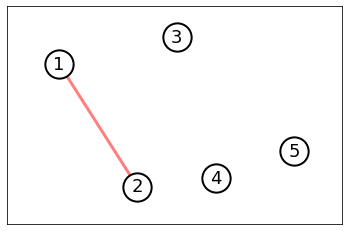

,1,2,3,4,5
1,0.00,14.14,31.17,0.00,0.00
2,-,0.00,0.00,0.00,0.00
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 1, j: 3
path  1: [(1, 2), (2, 3)]
path  2: []


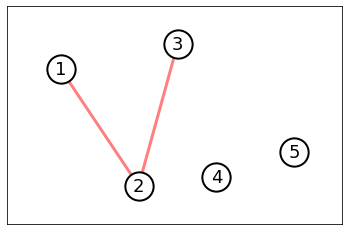

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,0.00
2,-,0.00,0.00,0.00,0.00
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 1, j: 4
path  1: [(1, 2), (2, 3), (3, 4)]
path  2: []


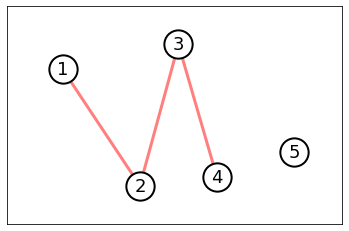

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,0.00,0.00,0.00,0.00
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 1, j: 5
path  1: [(1, 2), (2, 3), (3, 4), (4, 5)]
path  2: []


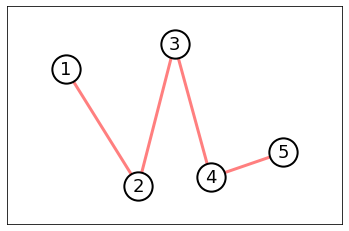

i: 2, j: 2, k: 1


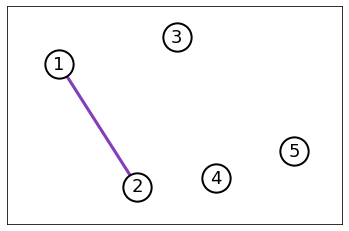

MIN = i: 2, j: 2, k: 1
path  1: [(1, 2)]
path  2: [(1, 2)]


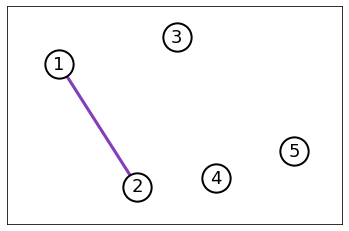

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,0.00,0.00,0.00
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 2, j: 3, k: 1


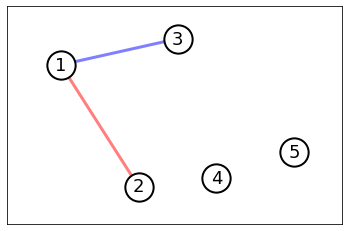

MIN = i: 2, j: 3, k: 1
path  1: [(1, 2)]
path  2: [(1, 3)]


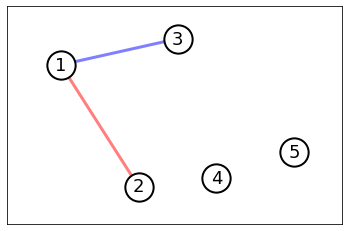

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,0.00,0.00
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 2, j: 4
path  1: [(1, 2)]
path  2: [(1, 3), (3, 4)]


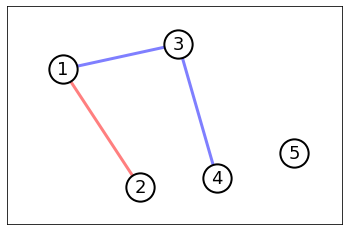

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,34.42,0.00
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 2, j: 5
path  1: [(1, 2)]
path  2: [(1, 3), (3, 4), (4, 5)]


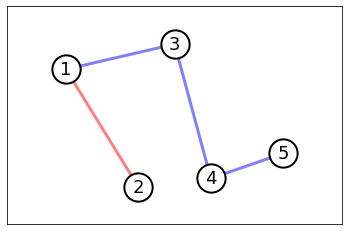

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,34.42,38.02
3,-,-,0.00,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 3, j: 3, k: 1


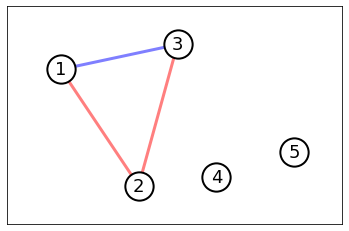

i: 3, j: 3, k: 2


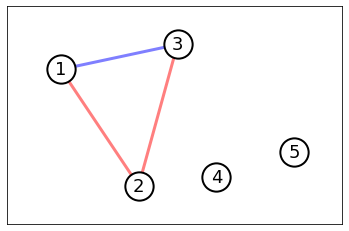

MIN = i: 3, j: 3, k: 2
path  1: [(1, 2), (2, 3)]
path  2: [(1, 3)]


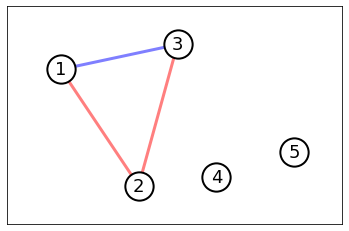

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,34.42,38.02
3,-,-,35.41,0.00,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 3, j: 4, k: 1


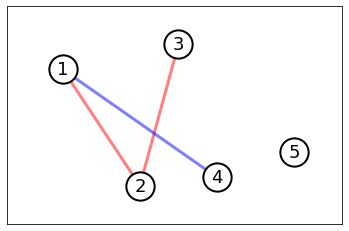

i: 3, j: 4, k: 2


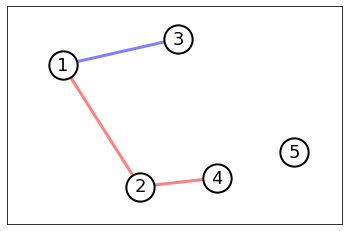

MIN = i: 3, j: 4, k: 2
path  1: [(1, 2), (2, 4)]
path  2: [(1, 3)]


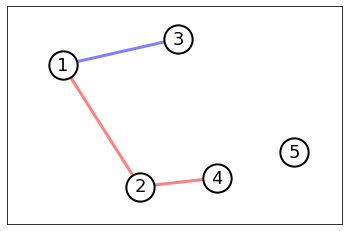

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,34.42,38.02
3,-,-,35.41,20.62,0.00
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 3, j: 5
path  1: [(1, 2), (2, 4), (4, 5)]
path  2: [(1, 3)]


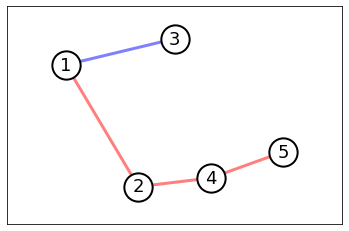

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,34.42,38.02
3,-,-,35.41,20.62,24.23
4,-,-,-,0.00,0.00
5,-,-,-,-,0.00


i: 4, j: 4, k: 1


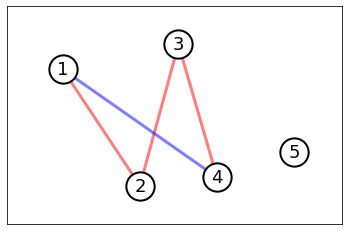

i: 4, j: 4, k: 2


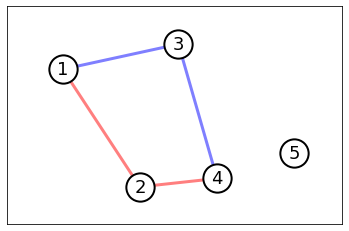

i: 4, j: 4, k: 3


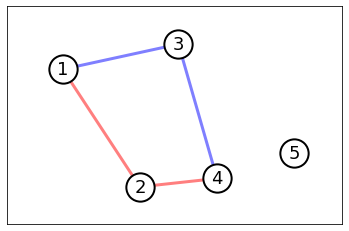

MIN = i: 4, j: 4, k: 3
path  1: [(1, 2), (2, 4)]
path  2: [(1, 3), (3, 4)]


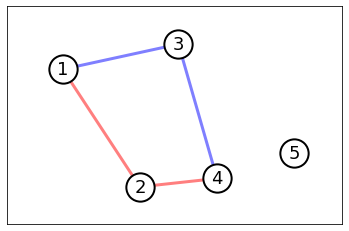

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,34.42,38.02
3,-,-,35.41,20.62,24.23
4,-,-,-,36.65,0.00
5,-,-,-,-,0.00


i: 4, j: 5, k: 1


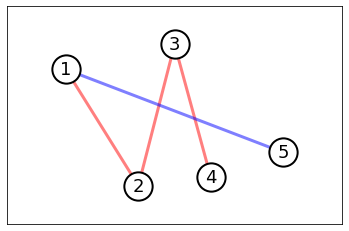

i: 4, j: 5, k: 2


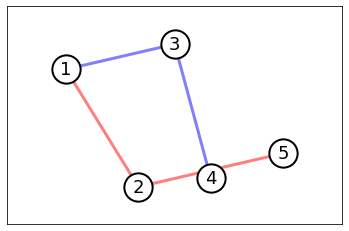

i: 4, j: 5, k: 3


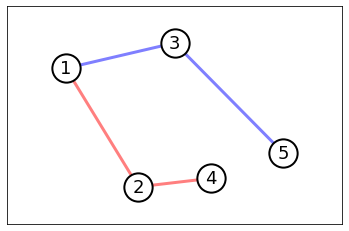

MIN = i: 4, j: 5, k: 3
path  1: [(1, 2), (2, 4)]
path  2: [(1, 3), (3, 5)]


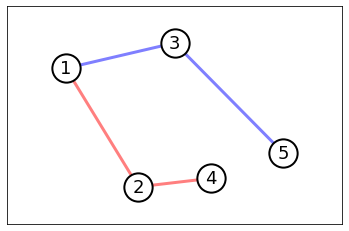

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,34.42,38.02
3,-,-,35.41,20.62,24.23
4,-,-,-,36.65,33.96
5,-,-,-,-,0.00


i: 5, j: 5, k: 1


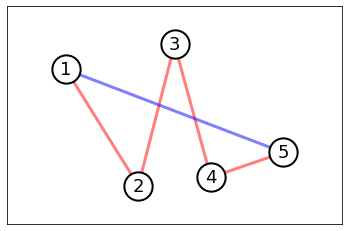

i: 5, j: 5, k: 2


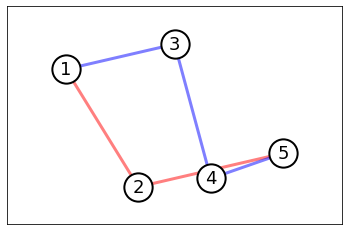

i: 5, j: 5, k: 3


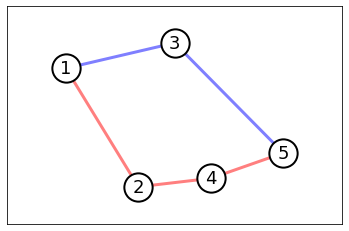

i: 5, j: 5, k: 4


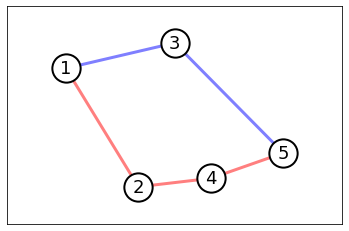

MIN = i: 5, j: 5, k: 4
path  1: [(1, 2), (2, 4), (4, 5)]
path  2: [(1, 3), (3, 5)]


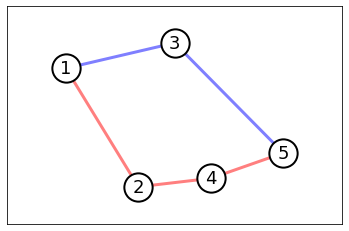

,1,2,3,4,5
1,0.00,14.14,31.17,47.20,50.81
2,-,28.28,18.38,34.42,38.02
3,-,-,35.41,20.62,24.23
4,-,-,-,36.65,33.96
5,-,-,-,-,37.57


In [4]:
df.loc[1, 2] = distances.loc[1, 2]

display(df.style.format(precision = 2))


backtrace_b[(1, 1)] = [(1, 1)]
backtrace_b[(1, 2)] = [(1, 2)]

f = [(1, 1)]
b = [(1, 2)]
print(f'i: 1, j: 2')
print_paths(G, pos, options, b, f)


for i in range(3, len(points)+1):
    df.loc[1, i] = df.loc[1, i-1] + distances.loc[i-1, i]

    display(df.style.format(precision = 2))

    backtrace_b[(1, i)] = backtrace_b[1, i-1] + [(i-1, i)]
    
    f, b = split_paths(backtrace_b[(1, i)])
    print(f'i: 1, j: {i}')
    print(f'path  1: {f}')
    print(f'path  2: {b}')
    print_paths(G, pos, options, f, b)


for i in range(2, len(points)+1):
    for j in range(i, len(points)+1):

        df.loc[i, j] = -1

        if i == j or i == j - 1:
            final_min = inf
            temp_min = inf
            path = []

            for k in range(1, i):
                temp_min = df.loc[k, i] + distances.loc[k, j]

                temp_path = backtrace_b[(k, i)] + [(k, j)]
                f, b = split_paths(temp_path)
                print(f'i: {i}, j: {j}, k: {k}')
                print_paths(G, pos, options, f, b)

                if (final_min > temp_min):
                    final_min = temp_min
                    path = [k, i, j]

            df.loc[i, j] = final_min
            backtrace_b[(i, j)] = backtrace_b[path[0], path[1]] + [(path[0], path[2])]

            f, b = split_paths(backtrace_b[(i, j)])
            print(f'MIN = i: {i}, j: {j}, k: {k}')
            print(f'path  1: {f}')
            print(f'path  2: {b}')
            print_paths(G, pos, options, f, b)


        else: # i < j - 1
            df.loc[i, j] = df.loc[i, j-1] + distances.loc[j-1, j]
            backtrace_b[(i, j)] = backtrace_b[i, j-1] + [(j-1, j)]

            f, b = split_paths(backtrace_b[(i, j)])
            print(f'i: {i}, j: {j}')
            print(f'path  1: {f}')
            print(f'path  2: {b}')
            print_paths(G, pos, options, f, b)

        display(df.style.format(precision = 2))

In [5]:
f, b = split_paths(backtrace_b[(len(points), len(points))])

print(f'Forward Path: {f}')
print(f'Backward Path: {b}')


Forward Path: [(1, 2), (2, 4), (4, 5)]
Backward Path: [(1, 3), (3, 5)]


## Complexity

Time complexity: A naive upperbound is $O(n^3)$ where $n$ is the number of points

- You must fill $\frac{n^2}{2}$ cells which can take $O(n)$ work per cell

- You can get a tighter bound by considering that it takes $O(n)$ work to fill a cell only under case 2. That is the case M[i, j] where $i = j - 1$ which only occurs $n - 1$ times. All other times it takes $O(1)$ work. Therefore, the time complexity is only $O(n^2)$

Space complexity: $O(n^2)$